# **INIT**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/add-learning/fselect/Output/mi+pca/

/content/drive/MyDrive/add-learning/fselect/Output/mi+pca


In [ ]:
XB = pd.read_csv('mipca_bc.csv')
# XC = pd.read_csv('chipca_cr.csv')
# XM = pd.read_csv('chipca_mg.csv')

In [ ]:
%cd /content/drive/MyDrive/add-learning/


/content/drive/MyDrive/add-learning


In [ ]:
YB = pd.read_csv('BREASTCancerdata.csv',usecols=['STAT_REC'])
# YC = pd.read_csv('COLRECTCancerdata_Analysis.csv',usecols=['STAT_REC'])
# YM = pd.read_csv('MALEGENCancerdata_Analysis.csv',usecols=['STAT_REC'])

In [ ]:
# XC.columns

In [ ]:
# # prompt: remove Unamed and CancerType from XC and XM and Unamed and CASENUM from XB

# # XB = XB.drop(columns=['Unnamed', 'CASENUM','STAT_REC'])
# XC = XC.drop(columns=['Unnamed', 'CancerType','STAT_REC'])
# XM = XM.drop(columns=['Unnamed', 'CancerType','STAT_REC'])

In [ ]:
XB_train, XB_test, YB_train, YB_test = train_test_split(XB, YB, test_size=0.2, random_state=42)
# XC_train, XC_test, YC_train, YC_test = train_test_split(XC, YC, test_size=0.2, random_state=42)
# XM_train, XM_test, YM_train, YM_test = train_test_split(XM, YM, test_size=0.2, random_state=42)

In [ ]:
scores_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall','Specificity','F1-Score'])


In [ ]:
XB.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], dtype='object')

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
# # prompt: correlation heatmap between XB and YB ; XC and YC; XM and YM

# import matplotlib.pyplot as plt
# import seaborn as sns

# # Assuming XB, YB, XC, YC, XM, and YM are already defined as in your provided code.

# def plot_correlation_heatmap(df, title):
#   """Plots a correlation heatmap for a given DataFrame."""
#   plt.figure(figsize=(8, 6))
#   corr_matrix = df.corr()
#   sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
#   plt.title(title)
#   plt.show()

# # Concatenate features and target variable for each dataset
# df_b = pd.concat([XB, YB], axis=1)
# df_c = pd.concat([XC, YC], axis=1)
# df_m = pd.concat([XM, YM], axis=1)

# # Plot correlation heatmaps
# plot_correlation_heatmap(df_b, 'Correlation Heatmap for Breast Cancer Data')
# plot_correlation_heatmap(df_c, 'Correlation Heatmap for Colon Rectal Cancer Data')
# plot_correlation_heatmap(df_m, 'Correlation Heatmap for Male Genital Cancer Data')

# Feature Selection



VIF

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

ct = ["bc",'cr',"mg"]
n = 6 # Number of features to select
l2 = ['Unnamed','CancerType']
l1 = ['Unnamed','CASENUM']
fl = l1

for i in ct:
# Load dataset
  data = pd.read_csv('mod_'+i+'.csv')
  X = data.drop('STAT_REC', axis=1)
  if(i == "bc"):
    X = X.drop(columns=l1)
  else:
    X = X.drop(columns=l2)
# Calculate VIF for each feature
  vif_data = pd.DataFrame()
  vif_data['Features'] = X.columns
  vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Save the VIF results to a CSV file
  vif_data.to_csv('vif_'+i+'.csv', index=False)
  print(f"VIF results for {i} saved")


VIF results for bc saved
VIF results for cr saved
VIF results for mg saved


**MI calculation**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif

# Load your dataset
data = pd.read_csv('mod_bc.csv')
data = data.drop(columns=['Unnamed','CASENUM'])

# Separate features and target
X = data.drop(columns='STAT_REC')  # Replace 'target' with your actual target column name
y = data['STAT_REC']  # Adjust this according to your target column

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate Mutual Information scores
mi_scores = mutual_info_classif(X_scaled, y)

# Create a DataFrame to store features and their MI scores
mi_df = pd.DataFrame({
    'Feature': X.columns,
    'MI_Score': mi_scores
})

# Sort by MI score
mi_df = mi_df.sort_values(by='MI_Score', ascending=False)

# Save to CSV
mi_df.to_csv('mi_bc.csv', index=False)
print("Mutual Information scores saved")


Mutual Information scores saved


ANOVA

In [ ]:
import pandas as pd
from sklearn.feature_selection import f_classif

ct = "mg"
n = 6 # Number of features to select
l1 = ['Unnamed','CancerType']
l2 = ['Unnamed','CASENUM']
fl = l1

# Load your custom dataset
data = pd.read_csv('mod_'+ct+'.csv')
data = data.drop(columns=fl)

X = data.drop(columns='STAT_REC')
y = data['STAT_REC']


# Perform ANOVA F-test
f_scores, p_values = f_classif(X, y)

# Create a DataFrame to hold feature names, F-scores, and p-values with specified headers
anova_results = pd.DataFrame({
    'Features': X.columns,
    'F-score': f_scores,
    'p-value': p_values
})

# Save the ANOVA results to a CSV file with specified headers
anova_results.to_csv('anova_'+ct+'.csv', index=False)

print('ANOVA results saved')

ANOVA results saved


CHI-Squared

In [ ]:
import pandas as pd
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

ct = "mg"
n = 6 # Number of features to select
l1 = ['Unnamed','CancerType']
l2 = ['Unnamed','CASENUM']

# Load your custom dataset
data = pd.read_csv('mod_'+ct+'.csv')
data = data.drop(columns=l1)
X = data.drop(columns='STAT_REC')
y = data['STAT_REC']

# Perform Chi-squared test
chi2_scores, p_values = chi2(X, y)

# Create a DataFrame to hold feature names, Chi-squared scores, and p-values with specified headers
chi2_results = pd.DataFrame({
    'Features': X.columns,
    'Chi-squared': chi2_scores,
    'p-value': p_values
})

# Save the Chi-squared test results to a CSV file
chi2_results.to_csv('chi/chi2_'+ct+'.csv', index=False)

print('Chi-squared test results saved')


Chi-squared test results saved


RFE with randomforestclassifier

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Step 1: Load the custom dataset
# Replace 'your_dataset.csv' with your file path and 'target' with your target column name
data = pd.read_csv('mod_bc.csv')
data = data.drop(columns=['Unnamed'])


# Assuming 'STAT_REC' is the target variable and all other columns are features
X = data.drop(columns='STAT_REC')
y = data['STAT_REC']

# Step 2: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Perform RFE with RandomForestClassifier
estimator = RandomForestClassifier(random_state=42)  # Setting a random state for reproducibility
rfe = RFE(estimator, n_features_to_select=10)
X_rfe_selected = rfe.fit_transform(X_scaled, y)

# Selected features' names
selected_rfe_features = X.columns[rfe.support_]
X_rfe_selected_df = pd.DataFrame(X_rfe_selected, columns=selected_rfe_features)

# Step 4: Save the selected features to a CSV file
X_rfe_selected_df.to_csv('rfe_bc.csv', index=False)
print("Selected features saved")


Selected features saved


Applying PCA

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 1: Load your dataset
# Replace 'your_dataset.csv' with your file path and adjust the target variable if needed
data = pd.read_csv('mod_bc.csv')
data = data.drop(columns=['Unnamed'])

# Assuming 'STAT_REC' is the target variable and all other columns are features
X = data.drop(columns='STAT_REC')  # Adjust according to your dataset

# Step 2: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Run PCA
pca = PCA(n_components=4)  # Choose the number of components you want to keep
X_pca = pca.fit_transform(X_scaled)

# Step 4: Create a DataFrame with PCA output
X_pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Step 5: Save the PCA output to a CSV file
X_pca_df.to_csv('pca_bc.csv', index=False)
print("PCA output saved")


PCA output saved


Mi + RFE

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

ct = "bc"
# Step 1: Load Dataset
data = pd.read_csv('mod_'+ct+'.csv')

# Load feature scores
mi_scores = pd.read_csv('mi_'+ct+'.csv')
mi_scores = mi_scores.sort_values(by='MI_Score', ascending=False)

# Step 2: Select Top Features Based on MI Scores
top_features = mi_scores['Feature'].head(10).tolist()  # Select top 10 features
X = data[top_features]
y = data['STAT_REC']

# Step 3: Standardize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Perform RFE with RandomForest
estimator = RandomForestClassifier(random_state=42)
rfe = RFE(estimator, n_features_to_select=3)  # Select top 5 features
X_rfe_selected = rfe.fit_transform(X_scaled, y)

# Selected features' names
selected_rfe_features = X.columns[rfe.support_]
X_rfe_selected_df = pd.DataFrame(X_rfe_selected, columns=selected_rfe_features)

# Step 5: Save the selected features to a CSV file
X_rfe_selected_df.to_csv('mirfe_'+ct+'.csv', index=False)
print("Selected features saved")



Selected features saved


MI + PCA

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

ct = "bc"
# Step 1: Load Dataset
data = pd.read_csv('mod_'+ct+'.csv')

# Load feature scores
mi_scores = pd.read_csv('mi_'+ct+'.csv')
mi_scores = mi_scores.sort_values(by='MI_Score', ascending=False)

# Step 2: Select Top Features Based on MI Scores
top_features = mi_scores['Feature'].head(10).tolist()  # Select top 10 features
X = data[top_features]
y = data['STAT_REC']

# Step 3: Standardize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Perform PCA
pca = PCA(n_components=5)  # Reduce to 5 principal components
X_pca = pca.fit_transform(X_scaled)

# Step 5: Save PCA components to CSV
pca_components_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
pca_components_df.to_csv('mipca_'+ct+'.csv', index=False)

print("PCA components saved")


PCA components saved


MI + RFE + PCA

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

# Define cancer datatype
ct = "mg"
fc = 3 # Select top 5 features from the top 10

# Step 1: Load Dataset
data = pd.read_csv('mod_'+ct+'.csv')

# Load MI scores
mi_scores = pd.read_csv('mi_'+ct+'.csv')
mi_scores = mi_scores.sort_values(by='MI_Score', ascending=False)

# Step 2: Select Top 10 Features Based on MI Scores
top_10_features = mi_scores['Feature'].head(10).tolist()
X = data[top_10_features]
y = data['STAT_REC']  # Adjust if target column name is different

# Step 3: Apply RFE with RandomForest to Select Top Features
estimator = RandomForestClassifier(random_state=42)
rfe = RFE(estimator, n_features_to_select=3)
X_rfe_selected = rfe.fit_transform(X, y)

# Get selected feature names after RFE
selected_features = [top_10_features[i] for i in range(len(top_10_features)) if rfe.support_[i]]
print("Selected features after RFE:", selected_features)

# Step 4: Standardize the RFE-selected features
scaler = StandardScaler()
X_rfe_scaled = scaler.fit_transform(X_rfe_selected)

# Step 5: Perform PCA on the RFE-selected features
pca = PCA(n_components=fc)  # Adjust n_components based on the desired reduction level
X_pca = pca.fit_transform(X_rfe_scaled)

# Step 6: Save PCA components to CSV
pca_components_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
pca_components_df.to_csv('all_'+ct+'.csv', index=False)

print("PCA components saved")


Selected features after RFE: ['AGE_DX', 'GRADE', 'NO_SURG']
PCA components saved


SFS with decision tree classifier

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split

ct = "bc"
n = 6 # Number of features to select
l1 = ['Unnamed','CancerType']
l2 = ['Unnamed','CASENUM']

# Load your custom dataset
data = pd.read_csv('mod_'+ct+'.csv')
data = data.drop(columns=l2)
X = data.drop(columns='STAT_REC')
y = data['STAT_REC']

# Split the data (optional, for evaluation purposes)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Decision Tree model
dtree = DecisionTreeClassifier(random_state=42)

# Create a Sequential Feature Selector with the Decision Tree model
selector = SequentialFeatureSelector(
    dtree, n_features_to_select=n, scoring='accuracy', direction='forward'  # Adjust n_features_to_select as needed
)

# Fit the selector to the training data
selector.fit(X_train, y_train)

# Get the selected features
selected_features = X.columns[selector.get_support()]

# Save the selected features to a CSV file
selected_features_df = pd.DataFrame(selected_features, columns=['Selected_Features'])
selected_features_df.to_csv('sfs_'+ct+'.csv', index=False)

print('The selected features are:', list(selected_features))


The selected features are: ['AGE_DX', 'BEHO3V', 'GRADE', 'NO_SURG', 'DTH_CLASS', 'O_DTH_CLASS']


CHI2 + PCA


In [ ]:
import pandas as pd
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler

ct = "mg"
n = 3 # Number of features to select

data = pd.read_csv('mod_'+ct+'.csv')
data = data.drop(columns=['Unnamed'])

X = data.drop(columns='STAT_REC')
y = data['STAT_REC']

chi2_results = pd.read_csv('chi2_'+ct+'.csv')

selected_features = chi2_results[chi2_results['p-value'] < 0.05]['Features']
X_selected = X[selected_features]

# Standardize selected features for PCA
scaler = StandardScaler()
X_selected_scaled = scaler.fit_transform(X_selected)

# Apply PCA on the selected features
pca = PCA(n_components=n)  # Adjust n_components based on your needs
X_pca = pca.fit_transform(X_selected_scaled)

# Determine the number of components from the shape of X_pca
num_components = X_pca.shape[1]

# Create column names dynamically for each principal component
column_names = [f'PC{i+1}' for i in range(num_components)]

# Create the DataFrame with dynamically generated column names
pca_df = pd.DataFrame(X_pca, columns=column_names)
pca_df.to_csv('chipca_'+ct+'.csv', index=False)

print('PCA on CHI2 saved')

PCA on CHI2 saved


ANOVA + PCA

In [ ]:
import pandas as pd
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler

ct = "cr"
n = 3 # Number of features to select

data = pd.read_csv('mod_'+ct+'.csv')
data = data.drop(columns=['Unnamed'])

X = data.drop(columns='STAT_REC')
y = data['STAT_REC']

anova_results = pd.read_csv('anova_'+ct+'.csv')

selected_features = anova_results[anova_results['p-value'] < 0.05]['Features']
X_selected = X[selected_features]

# Standardize selected features for PCA
scaler = StandardScaler()
X_selected_scaled = scaler.fit_transform(X_selected)

# Apply PCA on the selected features
pca = PCA(n_components=n)  # Adjust n_components based on your needs
X_pca = pca.fit_transform(X_selected_scaled)

# Determine the number of components from the shape of X_pca
num_components = X_pca.shape[1]

# Create column names dynamically for each principal component
column_names = [f'PC{i+1}' for i in range(num_components)]

# Create the DataFrame with dynamically generated column names
pca_df = pd.DataFrame(X_pca, columns=column_names)
pca_df.to_csv('anopca_'+ct+'.csv', index=False)

print('PCA on anova saved')

PCA on anova saved


# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier(

    n_estimators=100,  # number of trees

    max_depth=None,    # maximum depth of trees

    random_state=42    # for reproducibility

)

rf_model.fit(XB_train, YB_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [ ]:
YRTB = rf_model.predict(XB_test)

In [ ]:
accuracy1 = accuracy_score(YB_test, YRTB)
precision1 = precision_score(YB_test, YRTB)
recall1 = recall_score(YB_test, YRTB)
f11 = f1_score(YB_test, YRTB)
tn1, fp1, fn1, tp1 = confusion_matrix(YB_test, YRTB).ravel()
specificity1 = tn1 / (tn1+fp1)

print(f"Accuracy: {accuracy1}")
print(f"Precision: {precision1}")
print(f"Recall: {recall1}")
print(f"Specificity: {specificity1}")
print(f"F1 Score: {f11}")

Accuracy: 0.9464957456336767
Precision: 0.9537596866218172
Recall: 0.9644530173601543
Specificity: 0.9131366777578704
F1 Score: 0.9590765462968514


# **Ada BOOST**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada_model = AdaBoostClassifier(

    n_estimators=100,  # number of weak learners

    learning_rate=1.0, # learning rate

    random_state=42

)

ada_model.fit(XB_train, YB_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=100, random_state=42)

In [ ]:
YADAB = ada_model.predict(XB_test)

In [ ]:
accuracy = accuracy_score(YB_test, YADAB)
precision = precision_score(YB_test, YADAB)
recall = recall_score(YB_test, YADAB)
f1 = f1_score(YB_test, YADAB)
tn, fp, fn, tp = confusion_matrix(YB_test, YADAB).ravel()
specificity = tn / (tn+fp)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Specificity: {specificity}")
print(f"F1 Score: {f1}")

Accuracy: 0.8337774294670847
Precision: 0.8479461539700176
Recall: 0.906930283824745
Specificity: 0.6978820066547223
F1 Score: 0.8764469446686695


In [ ]:


new_row = pd.DataFrame({'Model': ['ADA'],
                        'Accuracy': [accuracy],
                        'Precision': [precision],
                        'Recall': [recall],
                        'Specificity': [specificity],
                        'F1-Score': [f1]})
scores_df = pd.concat([scores_df, new_row], ignore_index=True)
scores_df

<ipython-input-22-4eea9bf16401>:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  scores_df = pd.concat([scores_df, new_row], ignore_index=True)


,Model,Accuracy,Precision,Recall,Specificity,F1-Score
0,ADA,0.833777,0.847946,0.90693,0.697882,0.876447


# **Gaussian NB**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb_model = GaussianNB()

gnb_model.fit(XB_train, YB_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
YGNBB = gnb_model.predict(XB_test)

In [ ]:
accuracy = accuracy_score(YB_test, YGNBB)
precision = precision_score(YB_test, YGNBB)
recall = recall_score(YB_test, YGNBB)
f1 = f1_score(YB_test, YGNBB)
tn, fp, fn, tp = confusion_matrix(YB_test, YGNBB).ravel()
specificity = tn / (tn+fp)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Specificity: {specificity}")
print(f"F1 Score: {f1}")

Accuracy: 0.7116883116883117
Precision: 0.7314016442751153
Recall: 0.8794605952052907
Specificity: 0.40001919631430766
F1 Score: 0.7986268591357658


In [ ]:


new_row = pd.DataFrame({'Model': ['GNB'],
                        'Accuracy': [accuracy],
                        'Precision': [precision],
                        'Recall': [recall],
                        'Specificity': [specificity],
                        'F1-Score': [f1]})
scores_df = pd.concat([scores_df, new_row], ignore_index=True)
scores_df

,Model,Accuracy,Precision,Recall,Specificity,F1-Score
0,ADA,0.833777,0.847946,0.906930,0.697882,0.876447
1,GNB,0.711688,0.731402,0.879461,0.400019,0.798627


In [ ]:

scores_df

,Model,Accuracy,Precision,Recall,Specificity,F1-Score
0,ADA,0.833777,0.847946,0.906930,0.697882,0.876447
1,GNB,0.711688,0.731402,0.879461,0.400019,0.798627


# **XG BOOST**

In [ ]:
import xgboost as xgb

In [ ]:
xgb_model = xgb.XGBClassifier(

    objective='binary:logistic',

    random_state=42,

    learning_rate=0.1,

    n_estimators=100,

    max_depth=3

)

xgb_model.fit(XB_train, YB_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
YXGBB = xgb_model.predict(XB_test)

In [ ]:
accuracy = accuracy_score(YB_test, YXGBB)
precision = precision_score(YB_test, YXGBB)
recall = recall_score(YB_test, YXGBB)
f1 = f1_score(YB_test, YXGBB)
tn, fp, fn, tp = confusion_matrix(YB_test, YXGBB).ravel()
specificity = tn / (tn+fp)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.8867778772951187
Precision: 0.8859732440394739
Recall: 0.9478162028106917
F1 Score: 0.9158519233489487


In [ ]:
new_row = pd.DataFrame({'Model': ['XGB'],
                        'Accuracy': [accuracy],
                        'Precision': [precision],
                        'Recall': [recall],
                        'Specificity': [specificity],
                        'F1-Score': [f1]})
scores_df = pd.concat([scores_df, new_row], ignore_index=True)
scores_df

,Model,Accuracy,Precision,Recall,Specificity,F1-Score
0,ADA,0.833777,0.847946,0.906930,0.697882,0.876447
1,GNB,0.711688,0.731402,0.879461,0.400019,0.798627
2,XGB,0.886778,0.885973,0.947816,0.773388,0.915852


# **LOGISTIC**

In [ ]:
from sklearn.linear_model import LogisticRegression, Lasso


In [ ]:
logis_model = LogisticRegression(random_state=42)

logis_model.fit(XB_train, YB_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=42)

In [ ]:
YLOGISB = logis_model.predict(XB_test)

In [ ]:
accuracy = accuracy_score(YB_test, YLOGISB)
precision = precision_score(YB_test, YLOGISB)
recall = recall_score(YB_test, YLOGISB)
f1 = f1_score(YB_test, YLOGISB)
tn, fp, fn, tp = confusion_matrix(YB_test, YLOGISB).ravel()
specificity = tn / (tn+fp)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Specificity: {specificity}")
print(f"F1 Score: {f1}")

Accuracy: 0.7190998656515898
Precision: 0.7382583311656407
Recall: 0.8798222650868007
Specificity: 0.42052725876631686
F1 Score: 0.8028476685892096


In [ ]:
new_row = pd.DataFrame({'Model': ['LOG'],
                        'Accuracy': [accuracy],
                        'Precision': [precision],
                        'Recall': [recall],
                        'Specificity': [specificity],
                        'F1-Score': [f1]})
scores_df = pd.concat([scores_df, new_row], ignore_index=True)
scores_df

,Model,Accuracy,Precision,Recall,Specificity,F1-Score
0,ADA,0.833777,0.847946,0.906930,0.697882,0.876447
1,GNB,0.711688,0.731402,0.879461,0.400019,0.798627
2,XGB,0.886778,0.885973,0.947816,0.773388,0.915852
3,LOG,0.719100,0.738258,0.879822,0.420527,0.802848


# **ENSEMBLE**

In [ ]:
def create_meta_features(rf_pred, xgb_pred ):

      return np.column_stack((

              rf_pred[:, 1],

                         # Taking probability of class 1

                              xgb_pred[:, 1]
                                  ))

In [ ]:
meta_features_train = create_meta_features(

      rf_model.predict_proba(XB_train),

          xgb_model.predict_proba(XB_train)

              )

In [ ]:
meta_features_test = create_meta_features(

      rf_model.predict_proba(XB_test),

          xgb_model.predict_proba(XB_test)

              )


In [ ]:
meta_classifier = LogisticRegression()

meta_classifier.fit(meta_features_train, YB_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
ENSB = meta_classifier.predict(meta_features_test)


In [ ]:
accuracy = accuracy_score(YB_test, ENSB)
precision = precision_score(YB_test, ENSB)
recall = recall_score(YB_test, ENSB)
f1 = f1_score(YB_test, ENSB)
tn, fp, fn, tp = confusion_matrix(YB_test, ENSB).ravel()
specificity = tn / (tn+fp)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Specificity: {specificity}")
print(f"F1 Score: {f1}")

Accuracy: 0.9461934617107031
Precision: 0.9554924566385002
Recall: 0.9620418848167539
Specificity: 0.9167519836191451
F1 Score: 0.9587559857885793


In [ ]:
new_row = pd.DataFrame({'Model': ['ENSPxa'],
                        'Accuracy': [accuracy],
                                                'Precision': [precision],
                                                                        'Recall': [recall],
                                                                                                'Specificity': [specificity],
                                                                                                                        'F1-Score': [f1]})

In [ ]:
scores_df = pd.concat([scores_df, new_row], ignore_index=True)

In [ ]:
scores_df


,Model,Accuracy,Precision,Recall,Specificity,F1-Score
0,ADA,0.833777,0.847946,0.906930,0.697882,0.876447
1,GNB,0.711688,0.731402,0.879461,0.400019,0.798627
2,XGB,0.886778,0.885973,0.947816,0.773388,0.915852
3,LOG,0.719100,0.738258,0.879822,0.420527,0.802848
4,ENSPxa,0.946193,0.955492,0.962042,0.916752,0.958756


# **CROSS-VALIDATION**

In [ ]:
# prompt: 10 fold cross validation for the models Ada boost GNB XGB Logistic regressor with the accuracy precision recall specificity and F1 score

from sklearn.model_selection import cross_val_score, KFold

cv_scores_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall','Specificity','F1-Score'])

def evaluate_model(model, X, y):
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    accuracy = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    precision = cross_val_score(model, X, y, cv=kf, scoring='precision')
    recall = cross_val_score(model, X, y, cv=kf, scoring='recall')
    f1 = cross_val_score(model, X, y, cv=kf, scoring='f1')

    # Specificity calculation requires confusion matrix for each fold
    specificity_scores = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        specificity = tn / (tn + fp)
        specificity_scores.append(specificity)

    return accuracy.mean(), precision.mean(), recall.mean(), np.mean(specificity_scores), f1.mean()


models = {
    'AdaBoost': ada_model,
    'GNB': gnb_model,
    'XGBoost': xgb_model,
    'Logistic Regression': logis_model,
    'Proposed ':meta_classifier
}

for model_name, model in models.items():
    accuracy, precision, recall, specificity, f1 = evaluate_model(model, XB, YB)
    new_row = pd.DataFrame({'Model': [model_name],
                            'Accuracy': [accuracy],
                            'Precision': [precision],
                            'Recall': [recall],
                            'Specificity': [specificity],
                            'F1-Score': [f1]})
    cv_scores_df = pd.concat([cv_scores_df, new_row], ignore_index=True)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  w

In [ ]:
# prompt: 5 fold cross validation for the ensemble model with accuracy, precision, specificity, recall,and F1

from sklearn.model_selection import KFold

# Assuming XB, YB, rf_model, xgb_model, and create_meta_features are defined as in your provided code.

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores_df_cv = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score'])


for fold, (train_index, test_index) in enumerate(kf.split(XB)):
    X_train, X_test = XB.iloc[train_index], XB.iloc[test_index]
    y_train, y_test = YB.iloc[train_index], YB.iloc[test_index]

    # Train the base models
    rf_model.fit(X_train, y_train)
    xgb_model.fit(X_train, y_train)

    # Create meta features
    meta_features_train = create_meta_features(rf_model.predict_proba(X_train), xgb_model.predict_proba(X_train))
    meta_features_test = create_meta_features(rf_model.predict_proba(X_test), xgb_model.predict_proba(X_test))

    # Train the meta classifier
    meta_classifier = LogisticRegression()
    meta_classifier.fit(meta_features_train, y_train)

    # Predictions
    y_pred = meta_classifier.predict(meta_features_test)

    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)

    # Store the results
    new_row = pd.DataFrame({'Model': [f'ENSPxa_Fold_{fold+1}'],
                            'Accuracy': [accuracy],
                            'Precision': [precision],
                            'Recall': [recall],
                            'Specificity': [specificity],
                            'F1-Score': [f1]})
    scores_df_cv = pd.concat([scores_df_cv, new_row], ignore_index=True)

scores_df_cv

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-54-08f466980579>:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  scores_df_cv = pd.concat([scores_df_cv, new_row], ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConve

,Model,Accuracy,Precision,Recall,Specificity,F1-Score
0,ENSPxa_Fold_1,0.946014,0.954609,0.962731,0.914960,0.958653
1,ENSPxa_Fold_2,0.944010,0.951895,0.962650,0.909234,0.957242
2,ENSPxa_Fold_3,0.945891,0.953287,0.964007,0.912232,0.958617
3,ENSPxa_Fold_4,0.945779,0.954094,0.963186,0.913162,0.958619
4,ENSPxa_Fold_5,0.946170,0.952953,0.965294,0.910093,0.959084


In [ ]:
# prompt: i want the average scores of the ensemble model as average_scores

average_scores = scores_df_cv[['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score']].mean()
average_scores

,0
Accuracy,0.945573
Precision,0.953368
Recall,0.963574
Specificity,0.911936
F1-Score,0.958443


In [ ]:
# prompt: add the above score to cv_scores_df

# Assuming average_scores contains the average scores from the previous step.
# Assuming scores_df_cv is the DataFrame where you want to add the score.

# Create a new row with average scores
new_row = pd.DataFrame({'Model': ['Ensemble_Avg'],
                        'Accuracy': [average_scores['Accuracy']],
                        'Precision': [average_scores['Precision']],
                        'Recall': [average_scores['Recall']],
                        'Specificity': [average_scores['Specificity']],
                        'F1-Score': [average_scores['F1-Score']]})

# Concatenate the new row to scores_df_cv
cv_scores_df = pd.concat([cv_scores_df, new_row], ignore_index=True)
cv_scores_df

,Model,Accuracy,Precision,Recall,Specificity,F1-Score
0,AdaBoost,0.833835,0.845348,0.911697,0.688352,0.877262
1,GNB,0.714202,0.733811,0.880709,0.403114,0.800573
2,XGBoost,0.890595,0.890010,0.949372,0.780747,0.918728
3,Logistic Regression,0.720908,0.740082,0.880910,0.421989,0.804373
4,Proposed,0.720908,0.740082,0.880910,0.421989,0.804373
5,Ensemble_Avg,0.945573,0.953368,0.963574,0.911936,0.958443


# **RESULT EXPORT**

In [ ]:
cv_scores_df.to_csv('cv_scores_10fold.csv', index=False)

In [ ]:
scores_df.to_csv('scores_revised.csv', index=False)

# **CONFUSION MATRIX**

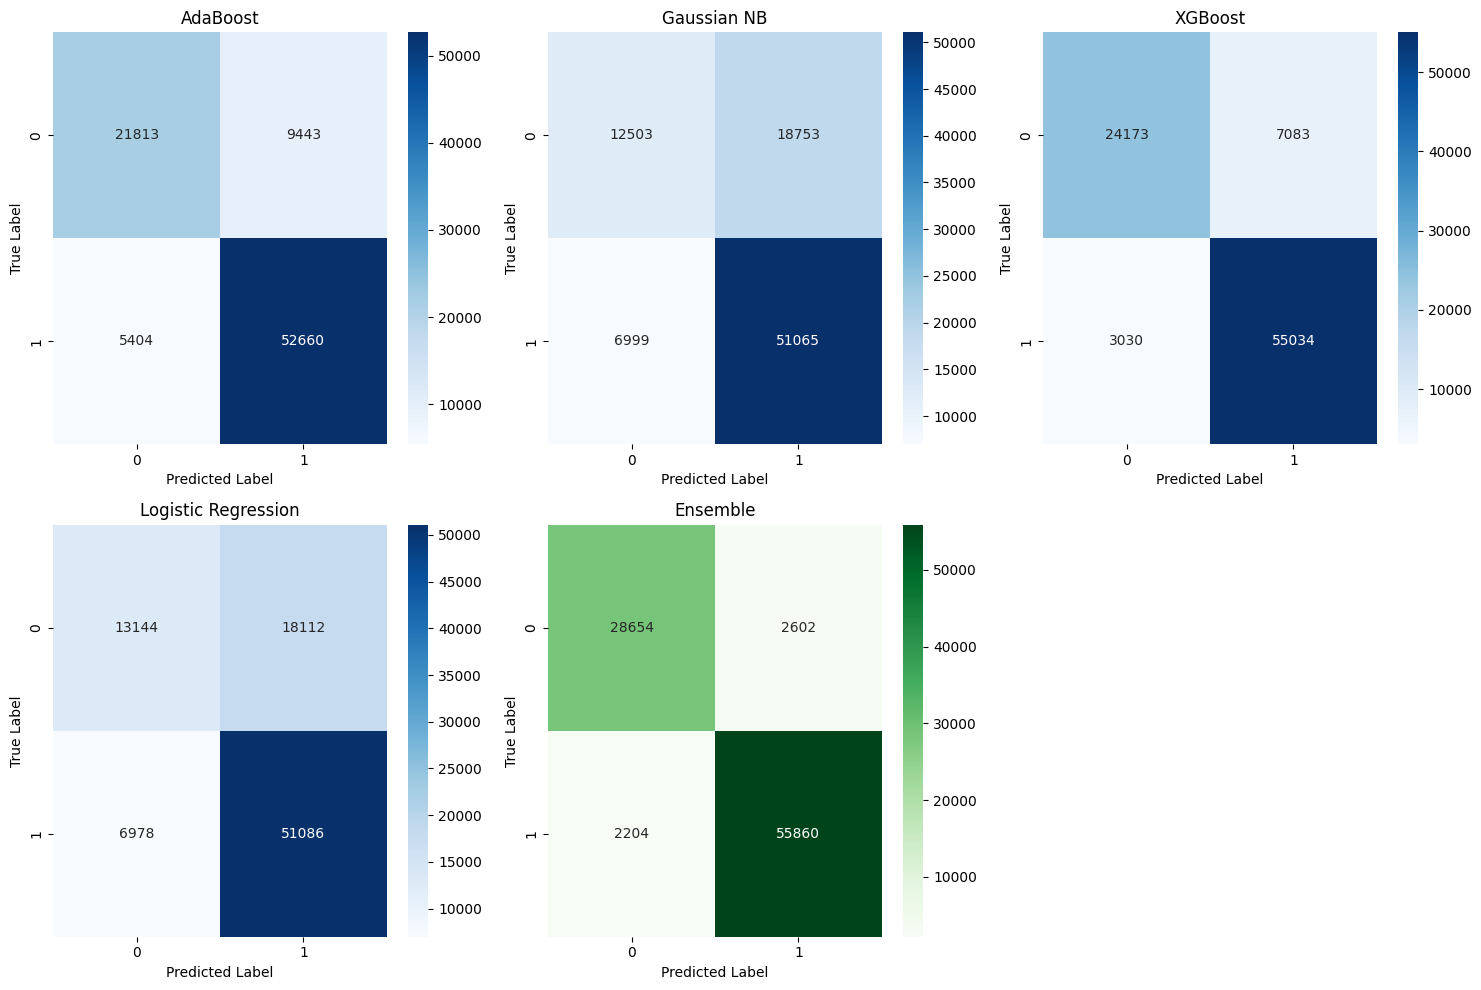

In [ ]:
# prompt: confusion matrices as subplots for all the above models alongside ensemble model (excluding random forest)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming YB_test, YADAB, YGNBB, YXGBB, YLOGISB, ENSB are defined as in your provided code.

models = {
    'AdaBoost': YADAB,
    'Gaussian NB': YGNBB,
    'XGBoost': YXGBB,
    'Logistic Regression': YLOGISB,
    'Ensemble': ENSB
}

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()  # Flatten the axes array for easier iteration

for i, (model_name, y_pred) in enumerate(models.items()):
    cm = confusion_matrix(YB_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues' if model_name != 'Ensemble' else 'Greens', ax=axes[i])
    axes[i].set_title(model_name)
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')


# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()

# **CORR**

In [ ]:
%cd /content/drive/MyDrive/add-learning/

/content/drive/MyDrive/add-learning


In [ ]:
XB = pd.read_csv("BREASTCancerdata.csv")

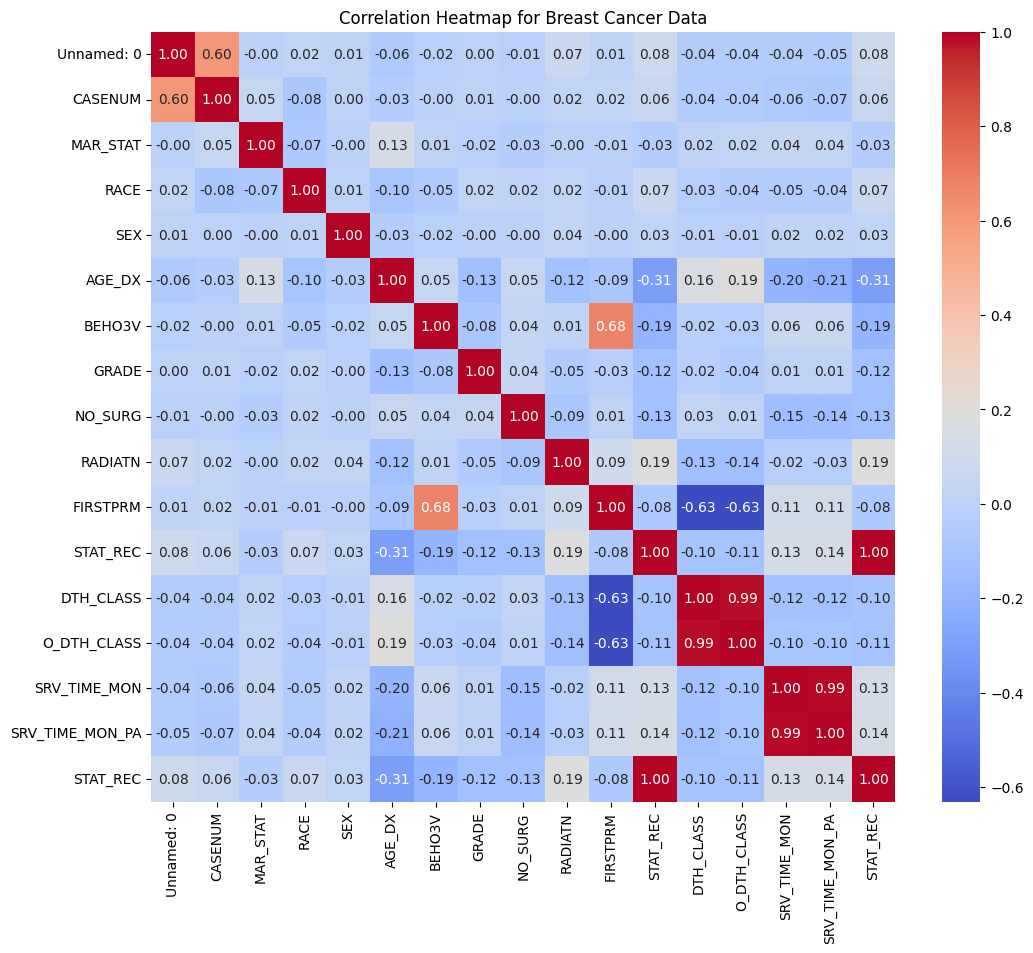

In [ ]:
# prompt: Generate a correlation heatmap of XB

import matplotlib.pyplot as plt
import seaborn as sns

# Concatenate features and target variable for breast cancer dataset
df_b = pd.concat([XB, YB], axis=1)

# Plot correlation heatmap for breast cancer data
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
corr_matrix = df_b.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Breast Cancer Data')
plt.show()